In [52]:
words = open("names.txt", "r").read().splitlines()

In [53]:
print(words)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

In [54]:
len(words)

32033

In [55]:
min(len(word) for word in words)

2

In [56]:
max(len(word) for word in words)

15

In [57]:
for word in words[:1]:
    for a, b in zip(word, word[1:]): # print pairwise mapping of elements in tuples (e, m, m, a) and (m, m, a) until no consecutive pairs are found (a in first tuple won't find a match so we only get three pairs)
        print(a, b)

e m
m m
m a


In [58]:
# adding start and end tokens to the name string
for word in words[:1]:
    chars = ["<s>"] + list(word) + ["<e>"]
    for ch1, ch2 in zip(chars, chars[1:]): # tuples now become (<s>, e, m, m, a, <e>) and (e, m, m, a, <e>)
        print(ch1, ch2)

<s> e
e m
m m
m a
a <e>


In [59]:
# keeping a count of bigrams
cnt = {}
for word in words:
    chars = ["<s>"] + list(word) + ["<e>"]
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        cnt[bigram] = cnt.get(bigram, 0) + 1 # increment count after initializing if key doesn't exist

In [60]:
# Sort bigrams in descending acc to frequency
print(sorted(cnt.items(), key = lambda kv: -kv[1]))

[(('n', '<e>'), 6763), (('a', '<e>'), 6640), (('a', 'n'), 5438), (('<s>', 'a'), 4410), (('e', '<e>'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('<s>', 'k'), 2963), (('l', 'e'), 2921), (('e', 'n'), 2675), (('l', 'a'), 2623), (('m', 'a'), 2590), (('<s>', 'm'), 2538), (('a', 'l'), 2528), (('i', '<e>'), 2489), (('l', 'i'), 2480), (('i', 'a'), 2445), (('<s>', 'j'), 2422), (('o', 'n'), 2411), (('h', '<e>'), 2409), (('r', 'a'), 2356), (('a', 'h'), 2332), (('h', 'a'), 2244), (('y', 'a'), 2143), (('i', 'n'), 2126), (('<s>', 's'), 2055), (('a', 'y'), 2050), (('y', '<e>'), 2007), (('e', 'r'), 1958), (('n', 'n'), 1906), (('y', 'n'), 1826), (('k', 'a'), 1731), (('n', 'i'), 1725), (('r', 'e'), 1697), (('<s>', 'd'), 1690), (('i', 'e'), 1653), (('a', 'i'), 1650), (('<s>', 'r'), 1639), (('a', 'm'), 1634), (('l', 'y'), 1588), (('<s>', 'l'), 1572), (('<s>', 'c'), 1542), (('<s>', 'e'), 1531), (('j', 'a'), 1473), (('r', '<e>'), 1377), (('n', 'e'), 1359), (('l'

## Storing bigrams in a Tensor!

In [61]:
import torch
N = torch.zeros((28, 28), dtype=torch.int32)

In [62]:
print(N.nelement() * N.element_size(), "bytes")

3136 bytes


In [63]:
chars = sorted(list(set(''.join(words))))
str_to_int = {str: int for int, str in enumerate(chars)}
str_to_int['<s>'] = 26
str_to_int['<e>'] = 27

print(str_to_int)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<s>': 26, '<e>': 27}


In [64]:
for w in words:
    characters = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(characters, characters[1:]):
        x = str_to_int[ch1]
        y = str_to_int[ch2]
        N[x][y] += 1

In [65]:
N # contains the counts in a tensor but it's ugly asf

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [66]:
# let's fix that
import matplotlib.pyplot as plt
%matplotlib inline

#int_to_str = {int: str for int, str in enumerate(chars)}
int_to_str = {int: str for str, int in str_to_int.items()} # adds <s> and <e> w/o more LoC :)

(-0.5, 27.5, 27.5, -0.5)

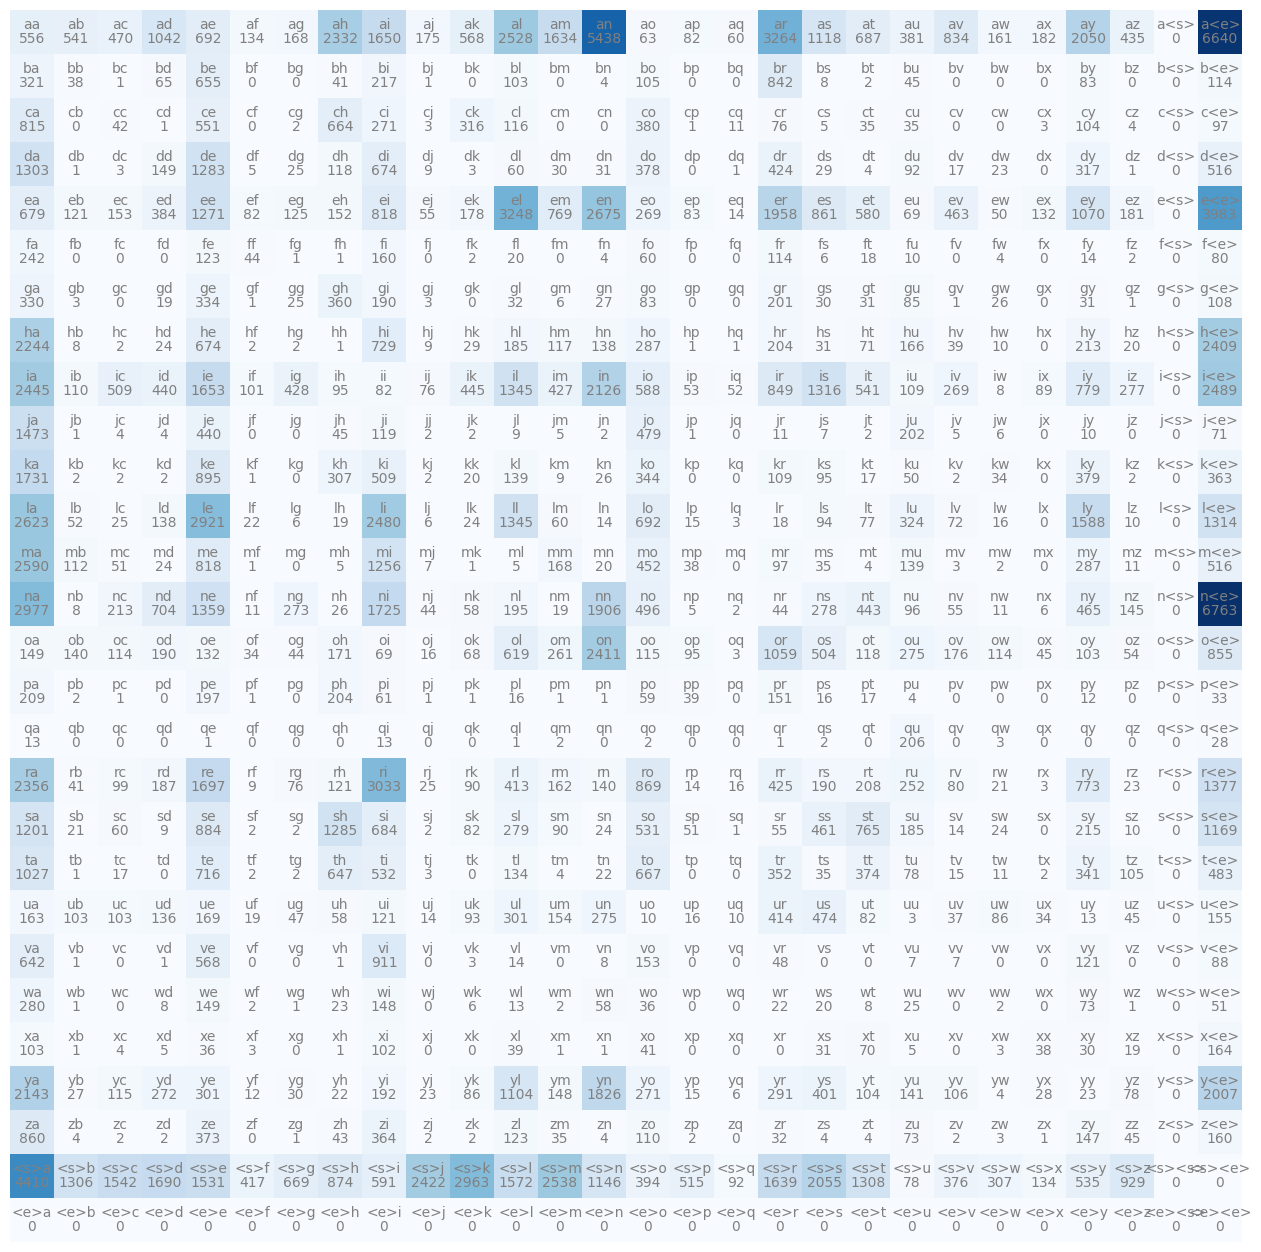

In [67]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        bigram = int_to_str[i] + int_to_str[j]
        plt.text(j, i, bigram, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

### Replace `<s>` and `<e>` tokens by . token to make the graph easier on eyes

In [68]:
chars = sorted(list(set("".join(words))))
str_to_int = {str: (int + 1) for int, str in enumerate(chars)} # we need our dot(.) to be at 0, so skipping 0 index
str_to_int['.'] = 0
int_to_str = {int: str for str, int in str_to_int.items()}
N = torch.zeros((27, 27), dtype=torch.int32)

print(int_to_str)
print(str_to_int)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [69]:
for w in words:
    characters = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(characters, characters[1:]):
        x = str_to_int[ch1]
        y = str_to_int[ch2]
        N[x][y] += 1

(-0.5, 26.5, 26.5, -0.5)

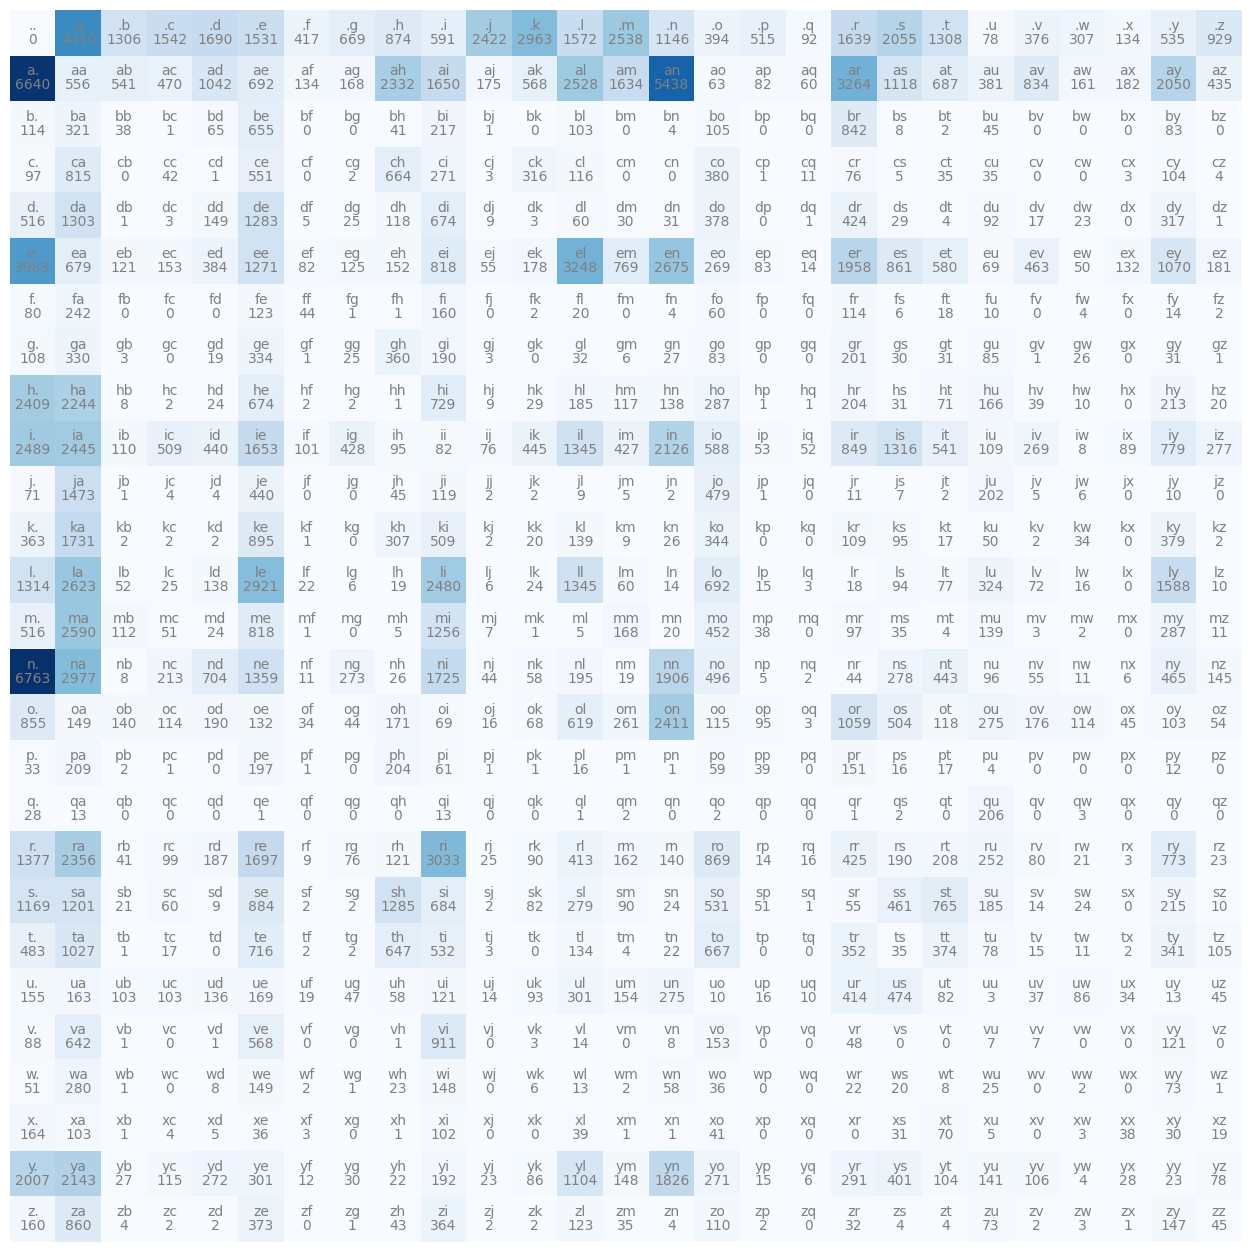

In [70]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        bigram = int_to_str[i] + int_to_str[j]
        plt.text(j, i, bigram, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

## Sampling from bigram model

In [71]:
n = N[0].float()
n = n / n.sum()
n

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [72]:
g = torch.Generator().manual_seed(2504)
p = torch.rand(3, generator=g)
p

tensor([0.2541, 0.4694, 0.0876])

In [73]:
# sampling according to probability
torch.multinomial(p, num_samples=1, replacement=True, generator=g)

tensor([1])

In [74]:
# sampling from first row of bigram (implies . is the first character in word ofc)
torch.multinomial(n, num_samples=100, replacement=True, generator=g)

tensor([26, 11, 18, 20, 14, 10,  5,  1, 22,  5, 18, 10, 20, 19,  3, 12,  5, 14,
         5, 11, 19,  4,  5, 11, 13, 11, 10, 23, 12, 18,  3,  1,  6, 13, 10,  4,
         5,  5, 13, 10, 20,  2,  1, 11, 20, 12, 12,  2, 13, 22,  1, 19,  5, 11,
        17, 20,  1,  2, 19, 11,  4,  3, 18, 12,  4, 18,  5, 10, 11,  4,  4, 14,
         1, 20,  1,  5, 11, 13,  2,  5, 11,  1, 12, 22, 13, 22, 13, 12,  2, 12,
        10, 11,  2,  1, 19, 19, 10, 12,  5, 14])

In [75]:
# predict next token!
int_x = torch.multinomial(n, num_samples=1, replacement=True, generator=g).item() # necessary for getting the value of a tensor element, else it's a tensor only
int_to_str[int_x]

'a'

In [76]:
for i in range(25):
    out = []
    int_x = 0 # start token is . as always
    while True:
        p = N[int_x].float() # will replace this inefficient logic in next section
        p = p / p.sum()
        int_x = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_str[int_x])
        if int_x == 0:
            break
    print("".join(out), end=", ")

kyt., grikostario., yben., zlin., tva., atalincri., jaai., d., a., ghay., de., tirishysa., k., ma., mranalar., keeleelouchayl., n., ktt., jazadolittahekus., ha., n., erakyin., jessth., sideijah., th., 

### Making normalization more efficient by using tensors and broadcasting
We are currently looping over the token and repeatedly calculating the probability distribution each time we do so. So let's just normalize all frequencies beforehand by their sum and store it in a tensor. Definitely go through [Broadcasting Semantics](https://docs.pytorch.org/docs/stable/notes/broadcasting.html) and more resources to fundamentally grasp how broadcasting works to prevent scary errors.

In [135]:
P = N.float()
P.shape

torch.Size([27, 27])

In [78]:
P.sum() # just produces a scalar value for all total counts of bigrams

tensor(228146.)

In [79]:
# we want to sum our rows, ie sum across columns since we want the total counts of all combinations followed by the first letter, so we pick dim=1
print("Without keepdim=True, shape is ", P.sum(1).shape)
# but this just deletes/squeezes the trailing dimension, which we need for broadcasting, so
print("With keepdim=True, shape is ", P.sum(1, keepdim=True).shape)

Without keepdim=True, shape is  torch.Size([27])
With keepdim=True, shape is  torch.Size([27, 1])


Usually keepdim won't be required if we squeeze the leftmost dimension but because broadcasting runs from right to left and it pads missing dimensions from left, P.sum(1)'s shape would become [1, 27] and we would divide each element by different sums instead of dividing by the same row as in [27, 1]. 

This would be a disaster because the probability distributions in that row won't even add up to be 1 and make the generation meaningless

In [80]:
P /= P.sum(1, keepdim=True)

In [99]:
for i in range(25):
    out = []
    ix = 0 # start token is . as always
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_str[ix])
        if ix == 0:
            break
    print("".join(out), end=", ")

y., sin., jouser., vilelamonze., sl., ka., t., aei., bazuadi., shar., ava., tah., jalian., dvlah., kav., sann., delan., mitaia., rthny., bra., th., fee., ajamannfabramauiseeeman., ch., ashrya., 

## Evaluating bigram model(statistical) based on Maximum Likelihood Estimation
It's a great concept that uses products of probabilities (which are very small so we use log probabilities to prevent underflow and make things easier to understand).

Main goal here is to **Maximize likelihood of data wrt model** which is
- equivalent to maximizing log likelihood (bcs log is monotonic)
- equivalent to minimizing negative log likelihood
- equivalent to minimizing average negative log likelihood

Loss functions tend to minimize a certain metric anyways so that works well in our favour

In [127]:
n = 0
log_likelihood = 0

#for w in words[:3]:
#for w in words:
for w in ["viratp"]:
    bigrams = ['.'] + list(w) + ['.']
    for c1, c2 in zip(bigrams, bigrams[1:]):
        ix1 = str_to_int[c1]
        ix2 = str_to_int[c2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n+= 1
        print(f"{c1}{c2} {prob=} {log_prob=}")

print(f"{log_likelihood=}")
neg_log_likelihood = -log_likelihood
print(f"Average Negative Log Likelihood: {neg_log_likelihood / n}")


.v prob=tensor(0.0117) log_prob=tensor(-4.4449)
vi prob=tensor(0.3541) log_prob=tensor(-1.0383)
ir prob=tensor(0.0480) log_prob=tensor(-3.0373)
ra prob=tensor(0.1855) log_prob=tensor(-1.6846)
at prob=tensor(0.0203) log_prob=tensor(-3.8984)
tp prob=tensor(0.) log_prob=tensor(-inf)
p. prob=tensor(0.0322) log_prob=tensor(-3.4369)
log_likelihood=tensor(-inf)
Average Negative Log Likelihood: inf


### Smooth out the model by adding a constant over zero frequency values
We can add any value from 1 to N to make the model more smooth. naturally some kind of tradeoff exists so we can't just add ANY value, but yeah we got to avoid the infinite value errors!

In [136]:
P = (N+10).float()
P /= P.sum(1, keepdim=True)

In [137]:
n = 0
log_likelihood = 0

#for w in words[:3]:
#for w in words:
for w in ["viratp"]:
    bigrams = ['.'] + list(w) + ['.']
    for c1, c2 in zip(bigrams, bigrams[1:]):
        ix1 = str_to_int[c1]
        ix2 = str_to_int[c2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n+= 1
        print(f"{c1}{c2} {prob=} {log_prob=}")

print(f"{log_likelihood=}")
neg_log_likelihood = -log_likelihood
print(f"Average Negative Log Likelihood: {neg_log_likelihood / n}")


.v prob=tensor(0.0119) log_prob=tensor(-4.4271)
vi prob=tensor(0.3240) log_prob=tensor(-1.1272)
ir prob=tensor(0.0478) log_prob=tensor(-3.0407)
ra prob=tensor(0.1824) log_prob=tensor(-1.7014)
at prob=tensor(0.0204) log_prob=tensor(-3.8919)
tp prob=tensor(0.0017) log_prob=tensor(-6.3699)
p. prob=tensor(0.0332) log_prob=tensor(-3.4058)
log_likelihood=tensor(-23.9640)
Average Negative Log Likelihood: 3.423433542251587


Works without any issues now! :)